# Exploratory Data Analysis of Rainfall Data for Agriculture

This notebook analyzes rainfall patterns using weather data.

Objectives:
- Analyze yearly rainfall trends
- Analyze monthly rainfall patterns
- Analyze rainfall by location
- Understand agricultural impact
- Visualize rainfall distributions


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv('weatherAUS.csv')

print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (145460, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [4]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df[['Date','Year','Month']].head()

,Date,Year,Month
0,2008-12-01,2008,12
1,2008-12-02,2008,12
2,2008-12-03,2008,12
3,2008-12-04,2008,12
4,2008-12-05,2008,12


## Yearly Rainfall Trend

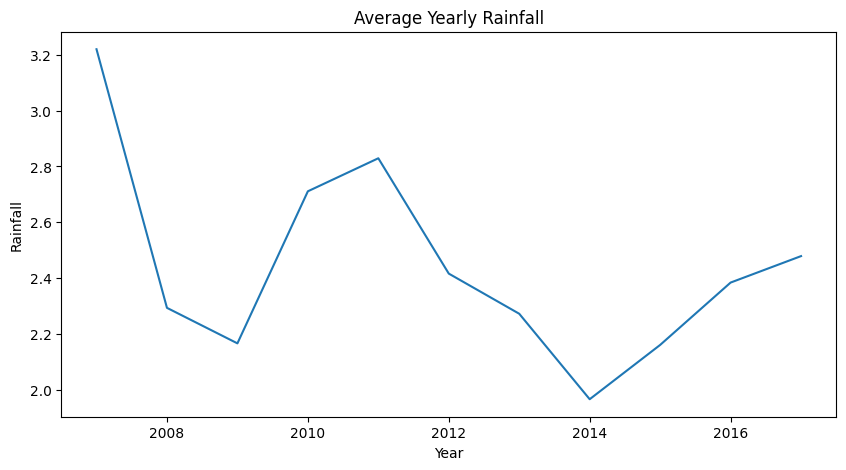

In [5]:
df.groupby('Year')['Rainfall'].mean().plot(figsize=(10,5))
plt.title('Average Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

## Monthly Rainfall Analysis

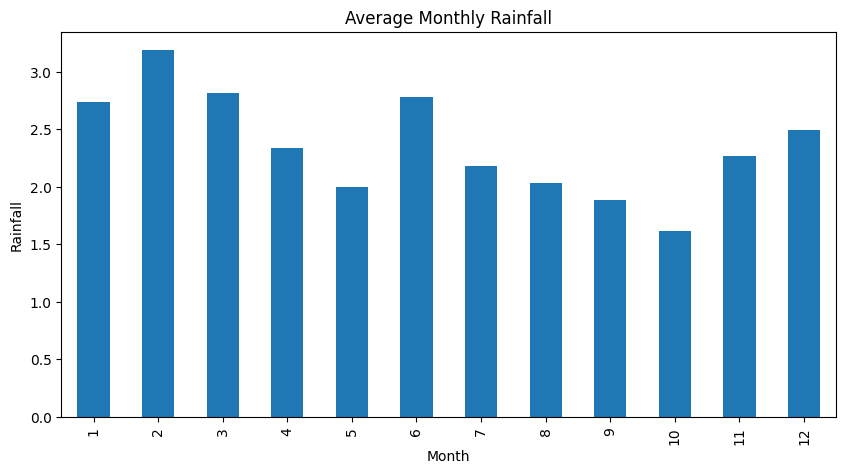

In [6]:
df.groupby('Month')['Rainfall'].mean().plot(kind='bar', figsize=(10,5))
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

## Location-wise Rainfall Analysis

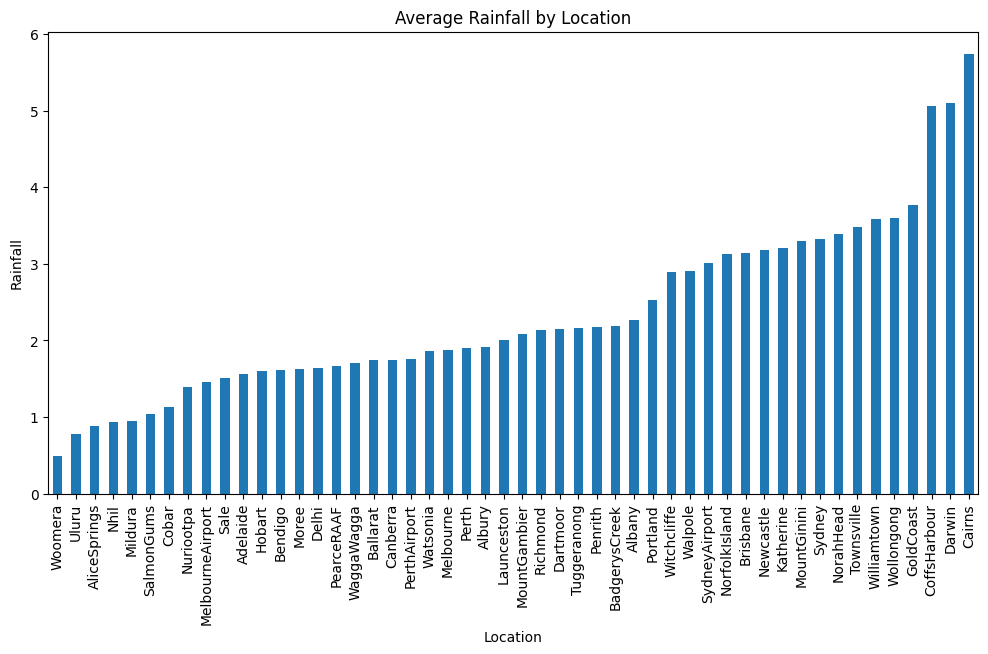

In [7]:
df.groupby('Location')['Rainfall'].mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.title('Average Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Rainfall')
plt.show()

## Rainfall Distribution

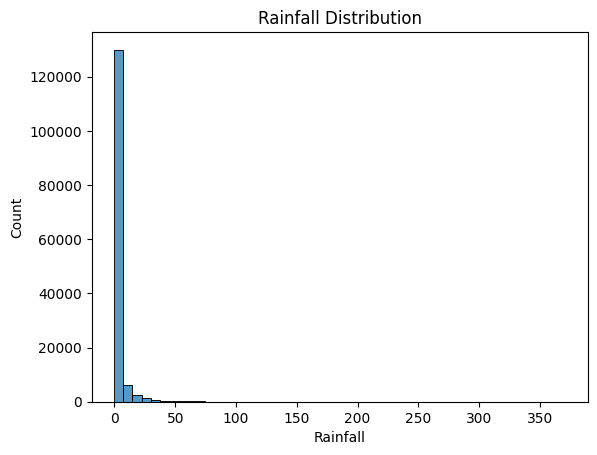

In [8]:
sns.histplot(df['Rainfall'], bins=50)
plt.title('Rainfall Distribution')
plt.show()

## RainTomorrow Count

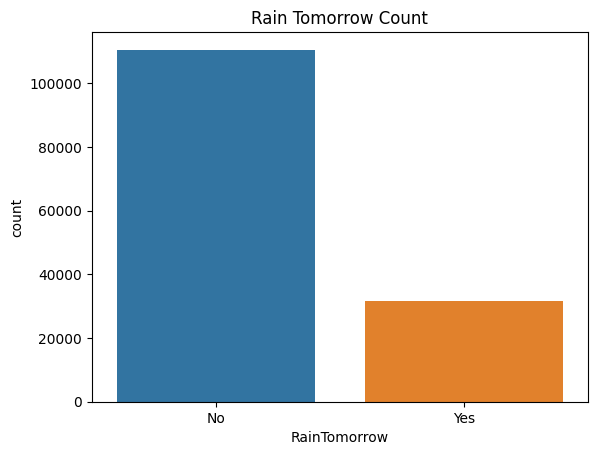

In [9]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('Rain Tomorrow Count')
plt.show()

## Correlation Heatmap

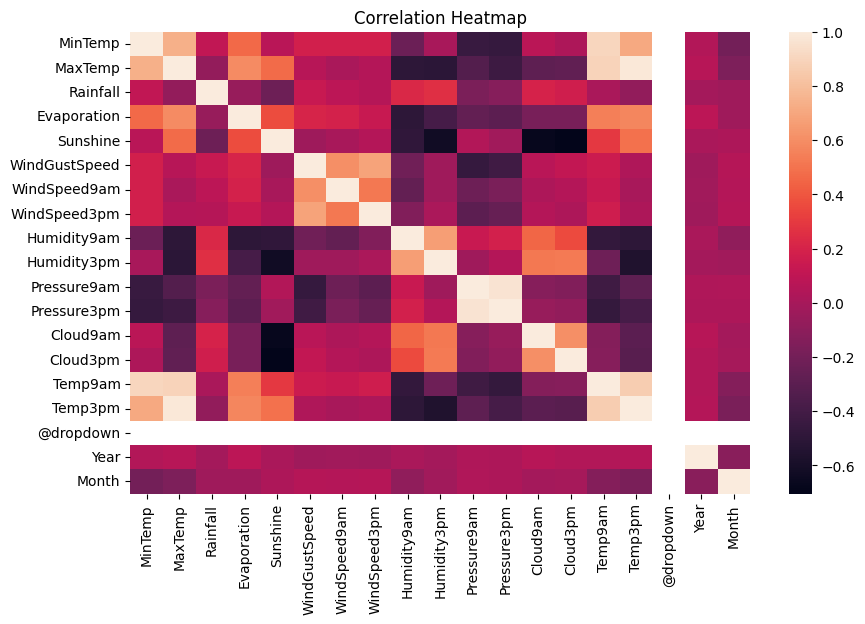

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False)
plt.title('Correlation Heatmap')
plt.show()

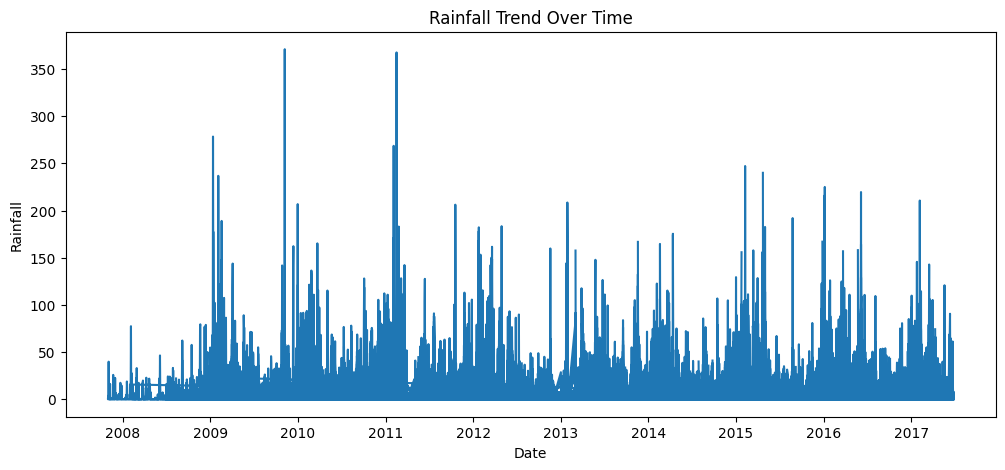

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Rainfall'])
plt.title("Rainfall Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.show()


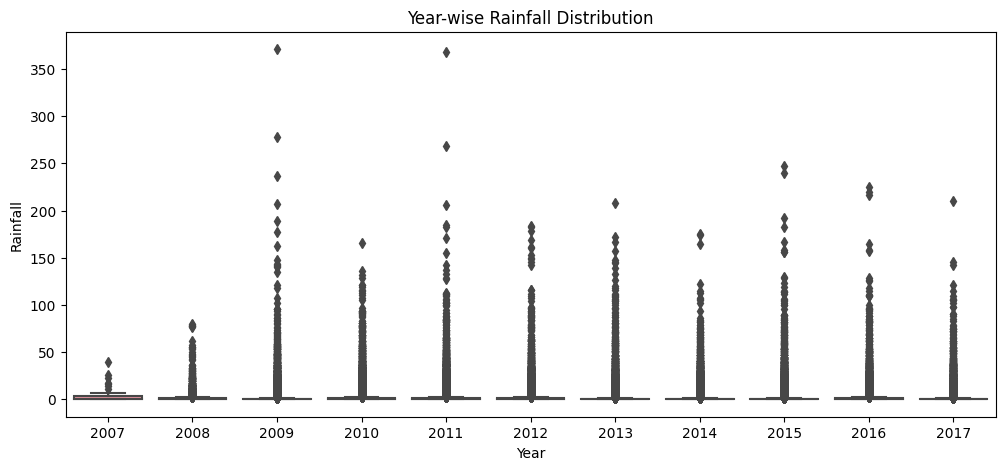

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Year', y='Rainfall', data=df)
plt.title("Year-wise Rainfall Distribution")
plt.show()


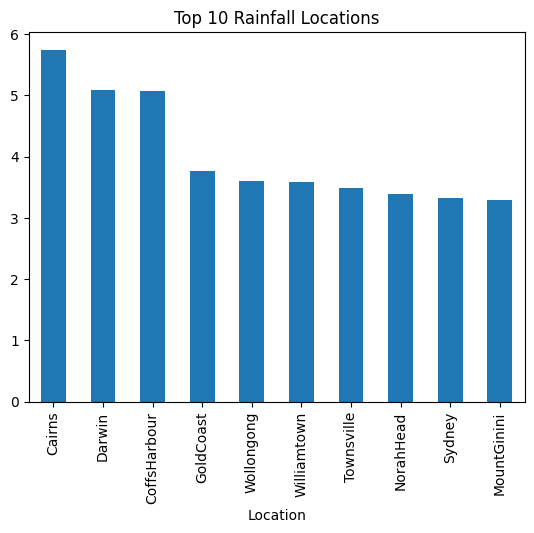

In [14]:
top10 = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).head(10)

top10.plot(kind='bar')
plt.title("Top 10 Rainfall Locations")
plt.show()


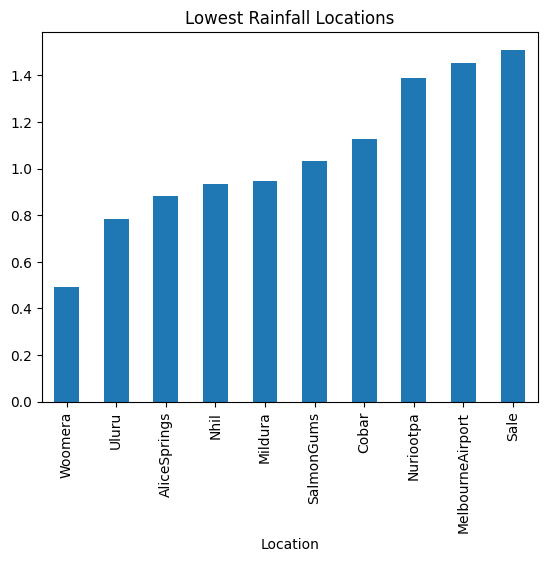

In [15]:
low10 = df.groupby('Location')['Rainfall'].mean().sort_values().head(10)

low10.plot(kind='bar')
plt.title("Lowest Rainfall Locations")
plt.show()


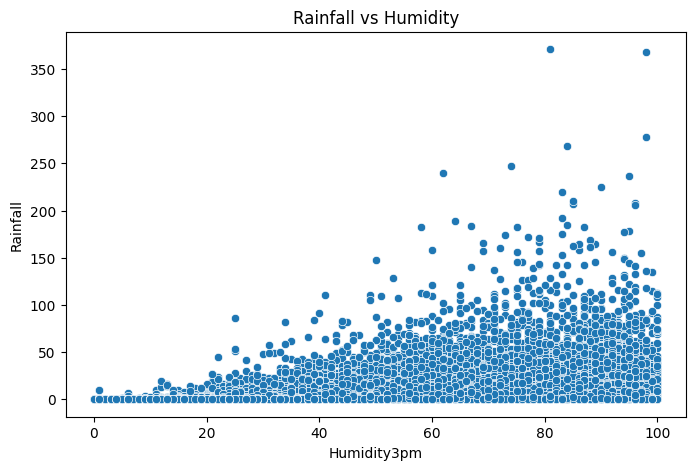

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Humidity3pm', y='Rainfall', data=df)
plt.title("Rainfall vs Humidity")
plt.show()


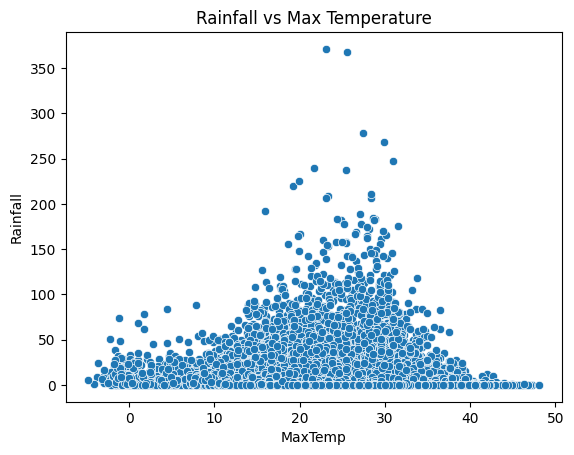

In [17]:
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df)
plt.title("Rainfall vs Max Temperature")
plt.show()


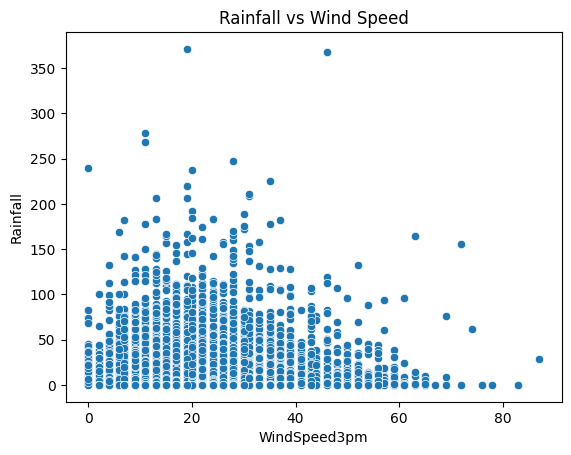

In [18]:
sns.scatterplot(x='WindSpeed3pm', y='Rainfall', data=df)
plt.title("Rainfall vs Wind Speed")
plt.show()


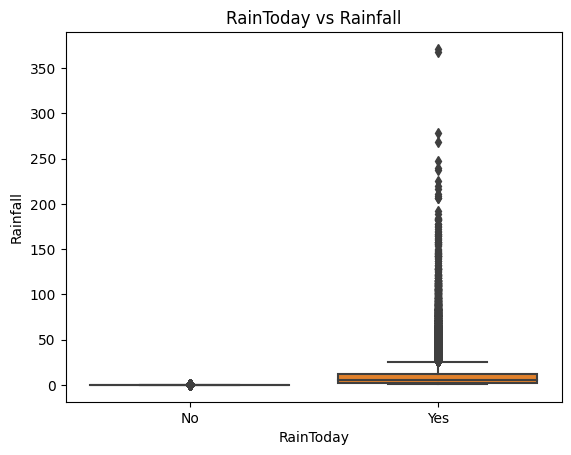

In [19]:
sns.boxplot(x='RainToday', y='Rainfall', data=df)
plt.title("RainToday vs Rainfall")
plt.show()


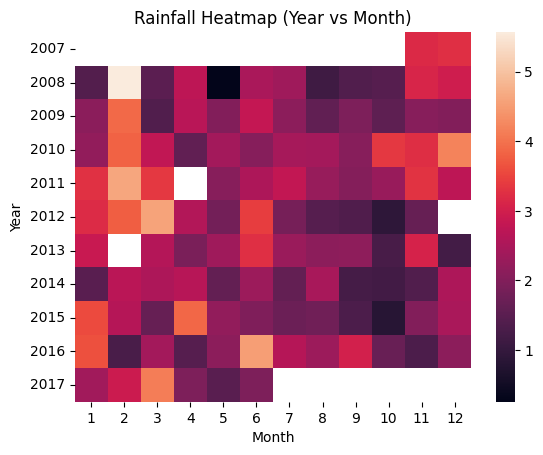

In [20]:
pivot = df.pivot_table(values='Rainfall', index='Year', columns='Month')

sns.heatmap(pivot)
plt.title("Rainfall Heatmap (Year vs Month)")
plt.show()


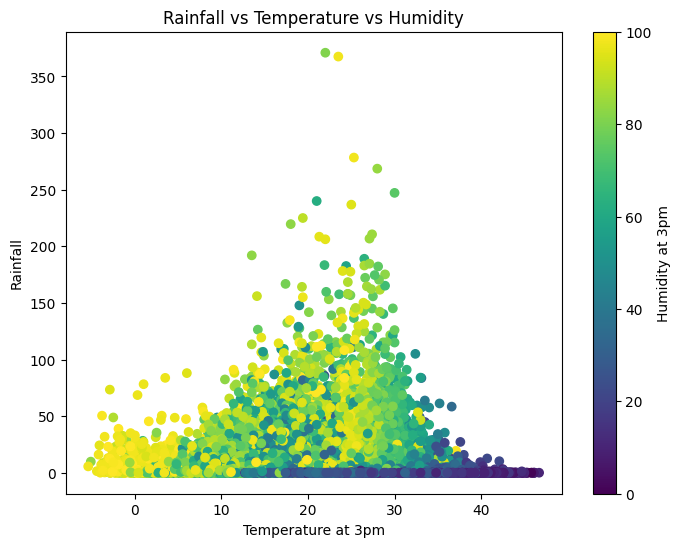

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df['Temp3pm'],        # Temperature
    df['Rainfall'],       # Rainfall
    c=df['Humidity3pm'],  # Humidity as color
    cmap='viridis'
)

plt.colorbar(scatter, label='Humidity at 3pm')

plt.xlabel('Temperature at 3pm')
plt.ylabel('Rainfall')
plt.title('Rainfall vs Temperature vs Humidity')

plt.show()


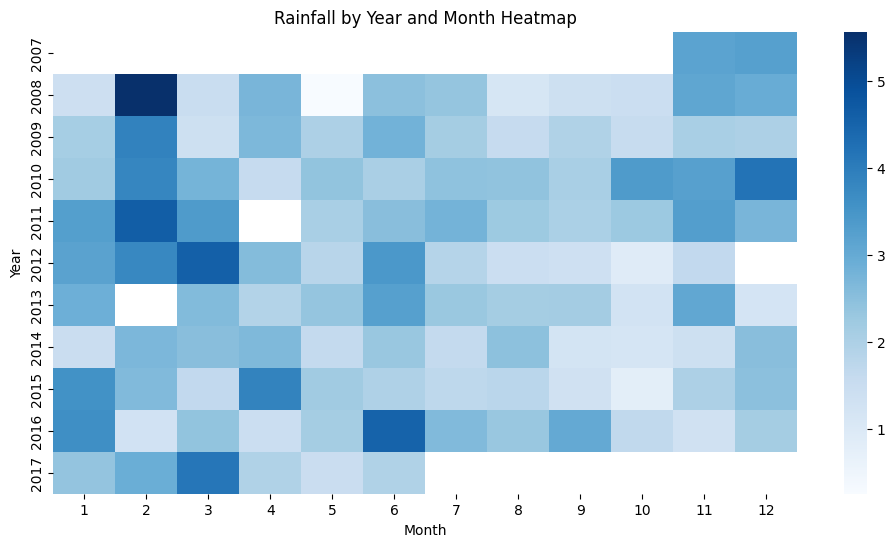

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create pivot table
rainfall_pivot = df.pivot_table(
    values='Rainfall',
    index='Year',
    columns='Month',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12,6))

sns.heatmap(
    rainfall_pivot,
    cmap='Blues',
    annot=False
)

plt.title('Rainfall by Year and Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()


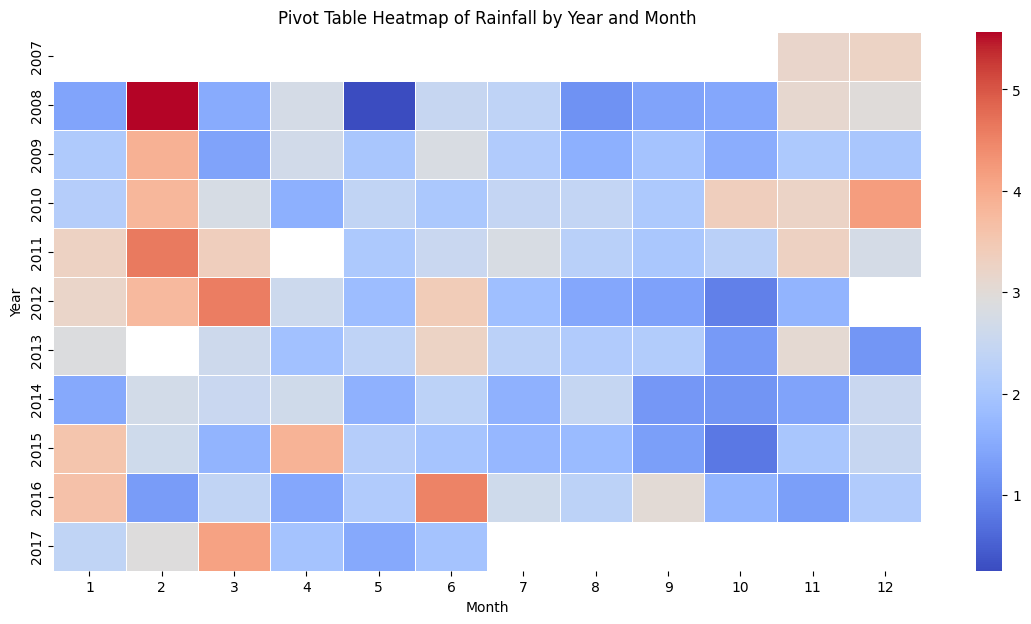

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create Pivot Table
pivot_table = df.pivot_table(
    values='Rainfall',
    index='Year',
    columns='Month',
    aggfunc='mean'
)

# Plot Heatmap
plt.figure(figsize=(14,7))

sns.heatmap(
    pivot_table,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Pivot Table Heatmap of Rainfall by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()


# Conclusion

- Rainfall varies significantly across years.
- Certain months experience higher rainfall.
- Rainfall distribution differs by location.
- Rainfall patterns are critical for agricultural planning.
- Understanding rainfall trends helps improve crop management.
